# Problem Statement
*    Create a book recommendation system based using Colabrative based filtering and content based filtering

 ### Importing libraries

In [1]:
!pip install langdetect

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
nltk.download('all')
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from langdetect import detect

[nltk_data] Error loading all: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


## Data Preprocessing

In [3]:
data=pd.read_csv("books_1.Best_Books_Ever[1].csv",on_bad_lines="skip")
data.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [4]:
data.shape

(52478, 25)

In [5]:
data.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [6]:
data.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [7]:
data.dtypes

bookId               object
title                object
series               object
author               object
rating              float64
description          object
language             object
isbn                 object
genres               object
characters           object
bookFormat           object
edition              object
pages                object
publisher            object
publishDate          object
firstPublishDate     object
awards               object
numRatings            int64
ratingsByStars       object
likedPercent        float64
setting              object
coverImg             object
bbeScore              int64
bbeVotes              int64
price                object
dtype: object

In [8]:
data.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


In [9]:
data.describe(include="object")

,bookId,title,series,author,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,ratingsByStars,setting,coverImg,price
count,52478,52478,23470,52478,51140,48672,52478,52478,52478,51005,4955,50131,48782,51598,31152,52478,52478,52478,51873,38113
unique,52424,49927,22802,28227,50888,81,48072,44154,12448,136,1788,1365,11110,10635,8024,9215,49908,4651,51819,3776
top,650584.Shadowdale,Legacy,Star Wars Legends,Nora Roberts (Goodreads Author),"هذه هي طبعة ""دار الفكر - بيروت"" وهي آخر طبعة ع...",English,9999999999999,[],[],Paperback,First Edition,320,Vintage,Published,01/01/12,[],[],[],https://i.gr-assets.com/images/S/compressed.ph...,5.20
freq,2,14,15,86,37,42661,4354,4623,38712,26773,458,1049,572,586,225,41864,1423,40900,2,626


In [10]:
data.duplicated().sum()

50

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.isnull().sum()

bookId                  0
title                   0
series              28983
author                  0
rating                  0
description          1336
language             3801
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47479
pages                2343
publisher            3692
publishDate           879
firstPublishDate    21303
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          621
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14344
dtype: int64

In [13]:
data.series.fillna("No Series",inplace=True)
data.series[:10]

0                                  The Hunger Games #1
1                                      Harry Potter #5
2                                To Kill a Mockingbird
3                                            No Series
4                                 The Twilight Saga #1
5                                            No Series
6                                            No Series
7    The Chronicles of Narnia (Publication Order) #1–7
8                           The Lord of the Rings #0-3
9                                            No Series
Name: series, dtype: object

In [14]:
data.description.fillna("",inplace=True)

In [15]:
data.title[data.language!="English"]

181                 Madame Bovary
199      Tote Mädchen lügen nicht
309            زندگی مه آلود پریا
354                 القرآن الكريم
369                   انتحار فاشل
                   ...           
52436        Nie wszystko w życiu
52440           Modlitwa o deszcz
52454               Au Petit Poil
52462                گل‌های معرفت
52464                   Algedonic
Name: title, Length: 9793, dtype: object

In [16]:
def find_lang(x):
    if pd.isna(x.language):
        return detect(x.title)
    else:
        return x.language
    
data.language=data.apply(find_lang,axis=1)


In [17]:
data[data.firstPublishDate.isnull() & data.publishDate.isnull()].shape[0]

257

In [18]:
def first_to_pub(x):
    if pd.isna(x.firstPublishDate):
        return x.publishDate
    else:
        return x.firstPublishDate
        
    
data.publishDate=data.apply(first_to_pub,axis=1)
data.publishDate.isnull().sum()


257

In [19]:
def date_to_year(x):
    k=(x.publishDate)
    if (pd.isna(k)):
        return 
    if len(k)==8:
        if int(k[-2:])>20:
            return "19"+k[6:]
        return "20"+k[6:]
    else:
        return k[-4:]
x=data.apply(date_to_year,axis=1)



In [20]:

x=pd.to_numeric(x,errors='coerce',downcast='signed')
data.publishDate=x


In [21]:
data=data.dropna(subset=["coverImg"],axis=0)

In [22]:
data.pages=pd.to_numeric(data.pages,errors='coerce',downcast='signed')
data.price=pd.to_numeric(data.price,errors='coerce',downcast='signed')


In [23]:
data.dtypes

bookId               object
title                object
series               object
author               object
rating              float64
description          object
language             object
isbn                 object
genres               object
characters           object
bookFormat           object
edition              object
pages               float64
publisher            object
publishDate         float64
firstPublishDate     object
awards               object
numRatings            int64
ratingsByStars       object
likedPercent        float64
setting              object
coverImg             object
bbeScore              int64
bbeVotes              int64
price               float64
dtype: object

In [24]:
iter_imputer = IterativeImputer(random_state=1)
num_cols=list(data.select_dtypes(include=['int64','float64']).columns)
num_cols

['rating',
 'pages',
 'publishDate',
 'numRatings',
 'likedPercent',
 'bbeScore',
 'bbeVotes',
 'price']

In [25]:
imputed = iter_imputer.fit_transform(data[num_cols])
x=data.drop(num_cols,axis=1)

y=pd.DataFrame(imputed, columns=num_cols)

In [26]:
final_data=pd.concat([x.reset_index(),y.reset_index()],axis=1)
final_data.isnull().any()

index               False
bookId              False
title               False
series              False
author              False
description         False
language            False
isbn                False
genres              False
characters          False
bookFormat           True
edition              True
publisher            True
firstPublishDate     True
awards              False
ratingsByStars      False
setting             False
coverImg            False
index               False
rating              False
pages               False
publishDate         False
numRatings          False
likedPercent        False
bbeScore            False
bbeVotes            False
price               False
dtype: bool

In [27]:
key_features=["title","series","author","rating","description","language","genres",
              "pages","publishDate","awards","numRatings","coverImg","likedPercent",
              "bbeScore","bbeVotes","price"]
final_data=final_data[key_features]

In [28]:
final_data.isnull().sum()

title           0
series          0
author          0
rating          0
description     0
language        0
genres          0
pages           0
publishDate     0
awards          0
numRatings      0
coverImg        0
likedPercent    0
bbeScore        0
bbeVotes        0
price           0
dtype: int64

# EDA

<AxesSubplot:xlabel='pages', ylabel='Count'>

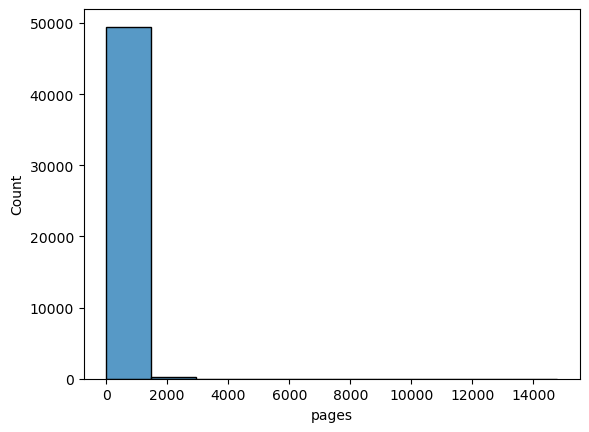

In [31]:
import seaborn as sns
sns.histplot(data=data, x='pages', bins=10)




<AxesSubplot:xlabel='pages', ylabel='price'>

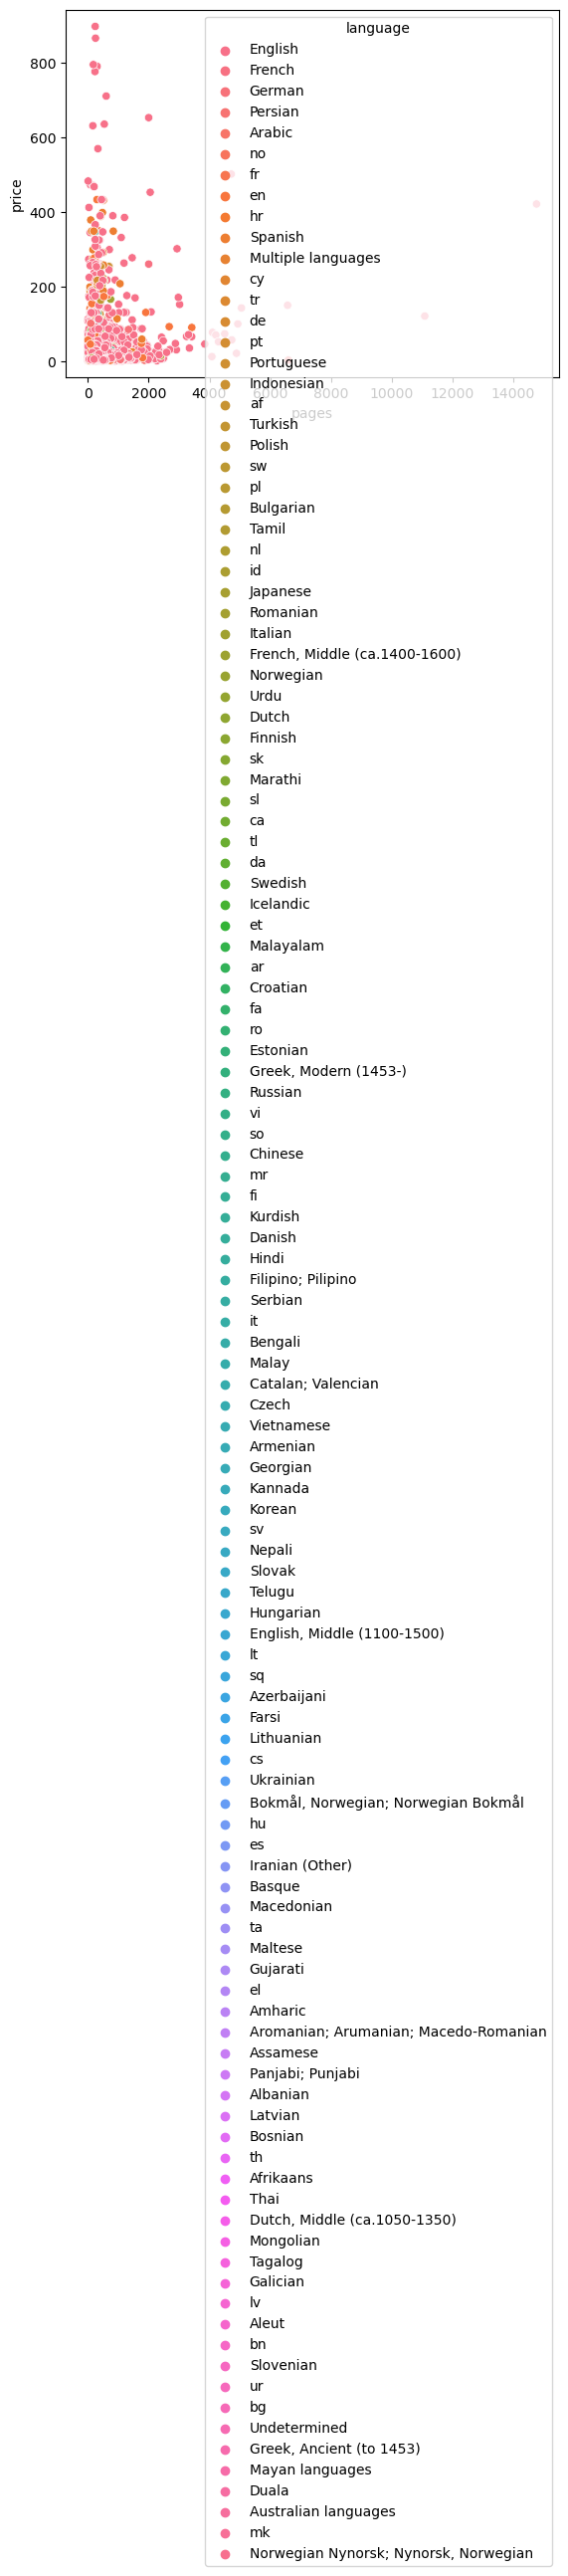

In [32]:
sns.scatterplot(data=data, x='pages', y='price', hue='language')


KeyError: 'category'

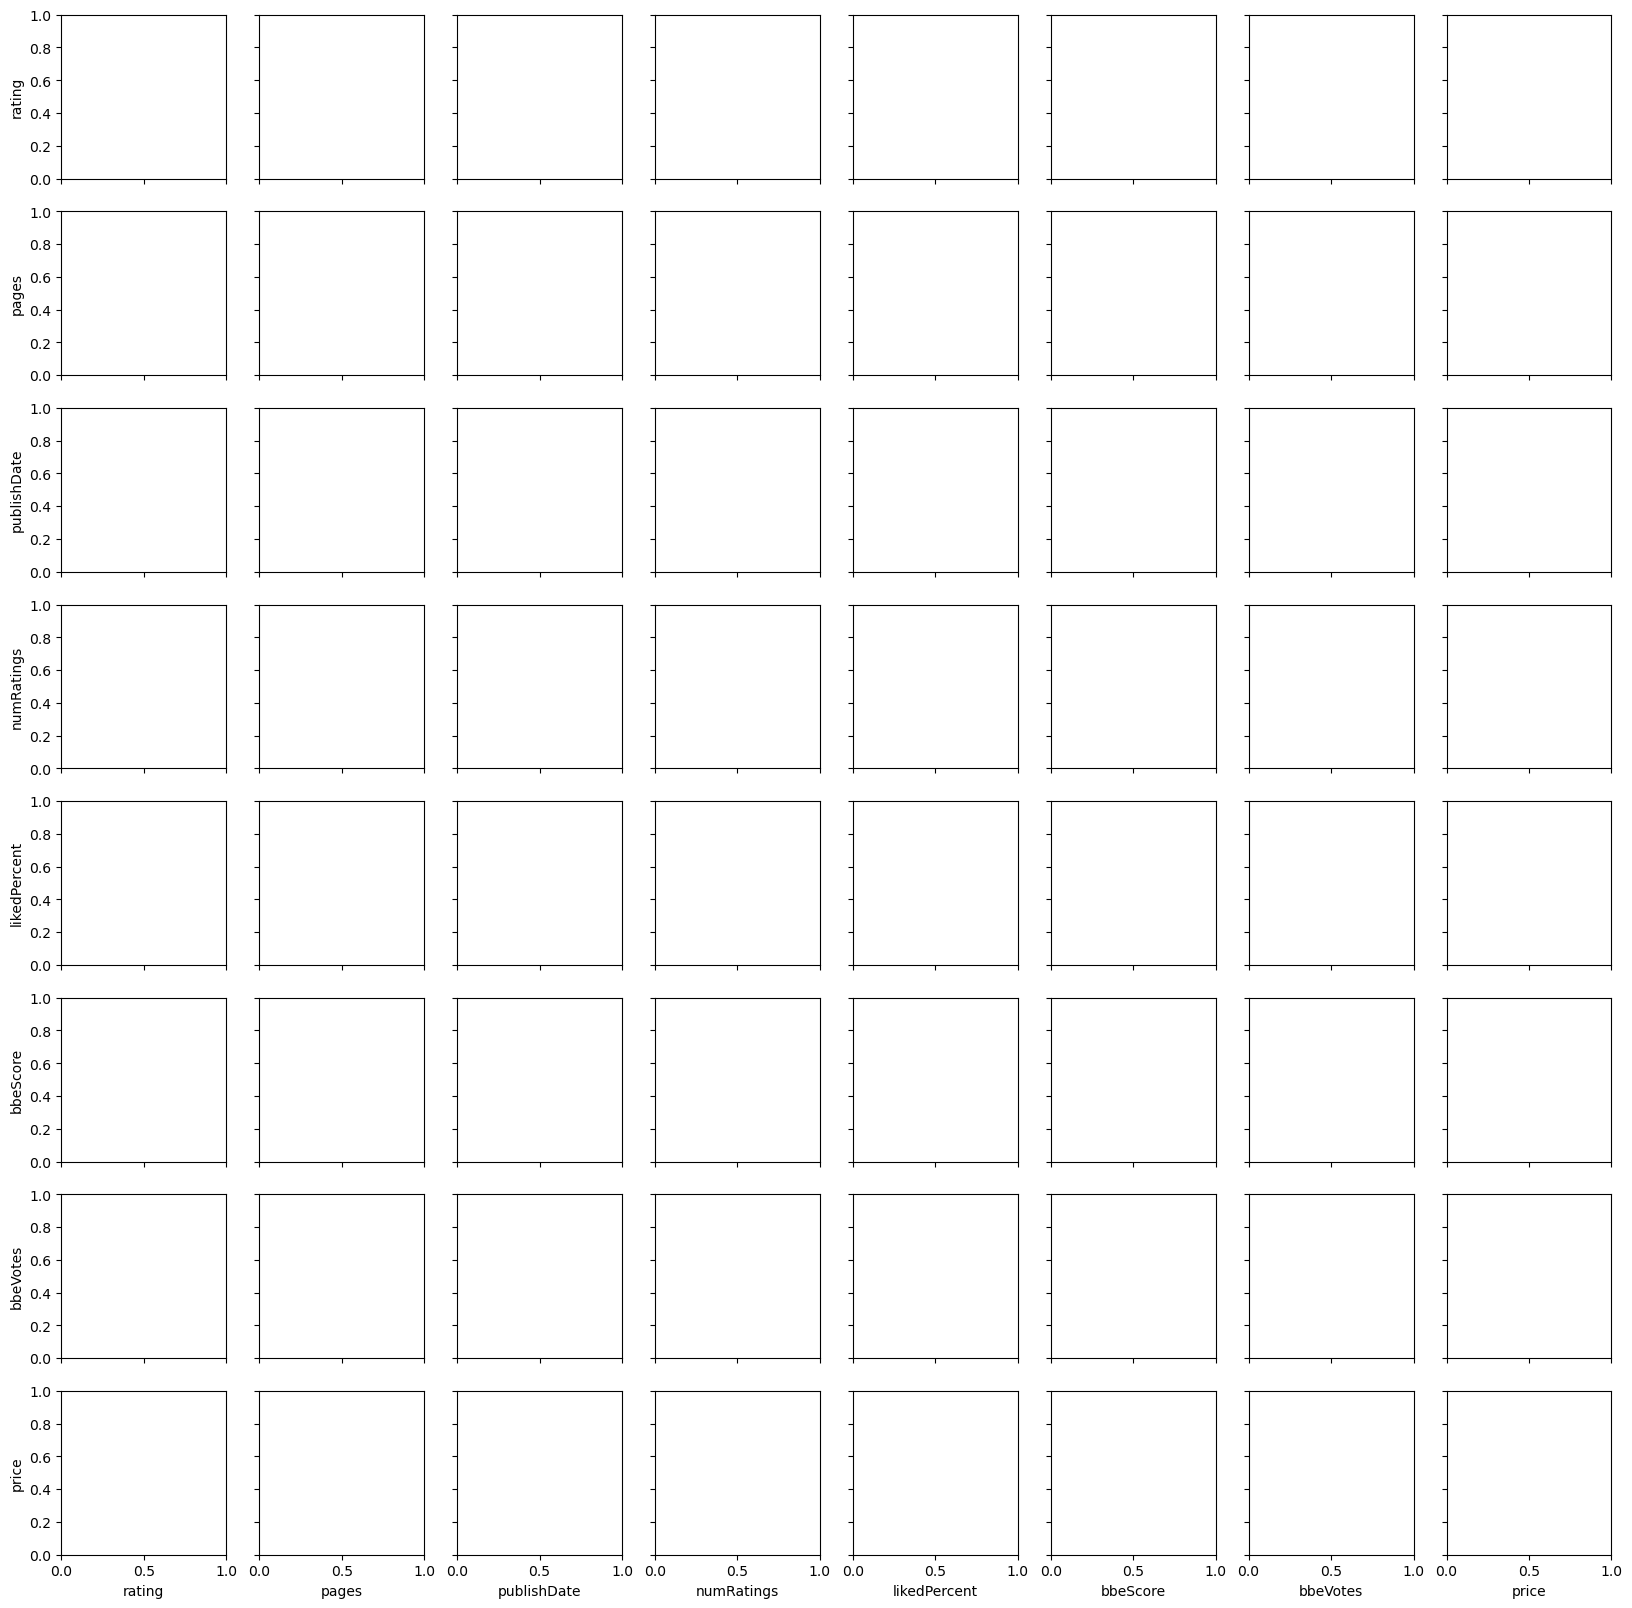

In [36]:
sns.pairplot(data, hue='category')

